# Case 2. Pneumonia X-ray image analysis. Group 4 model 5.
**Neural Networks for Machine Learning Applications**<br>
28.11.2024<br>
Group 4, Miska Nurminen, Jere Karppinen, Jaakko Virtanen, Karim Chaudri<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

The purpose of this Notebook is to develop a deep learning model that can classify lung X-rays into two categories: normal*(normal) * and pneumoniame**(pneumonia) . Pneumonia is a common and potentially serious lung infection in which rapid diagnosis is critical for effective treatment and patient recovery. Lung X-ray imaging combined with artificial intelligence offers a promising approach for more accurate and faster diagnosis.

The dataset used in this project contains 5,863 X-ray images classified into two categories (Normal/Pneumonia). The dataset is based on retrospective pediatric patient records, and all images have been reviewed by expert physicians. The model aims to use deep learning, such as convolutional neural networks (CNNs), to analyse images efficiently and provide a solution that could assist healthcare professionals in supporting diagnosis.

The main objectives of the notebook are:
1. to preprocess and prepare a dataset for machine learning.
2. to create and train a convolutional neural network (CNN) for pneumonia detection.
3. to evaluate the performance of the model in terms of accuracy, sensitivity and specificity.
4. Document the process and results clearly for furthe version)

## 2. Setup

- **NumPy**: Used for matrix and table manipulation, especially data preprocessing and numerical calculations.
- **Matplotlib**: a visualization library used for visualizing model performance and data, such as graphs and images.
- **TensorFlow & Keras**: A complete machine learning and deep learning environment for model building, training and evaluation. Keras is TensorFlow's high-level API used for model building and optimization.
- **tensorflow.keras.utils**: Import `image_dataset_from_directory` function, which helps to create a dataset of images from folders.
- **tensorflow.keras.layers**: Various layers, such as convolution and dense layers, are used to create the model and process the input.
- **TensorFlow.keras.optimizers, losses, metrics**: optimizers, error functions and metrics used to train and evaluate the model.
- **os**: Needed to handle files and directories, e.g. to define file version)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras import layers, optimizers, losses, metrics
import os

## 3. Dataset

The Chest X-ray Pneumonia dataset contains **5,863 X-ray images**, divided into three main folders:
- **Train**: for training the model.
- **Test**: for evaluating the model.
- **Validation**: for fine-tuning the model.

The images are divided into two categories:
- **Normal**: X-ray images of normal lungs.
- **Pneumonia**: X-rays showing pneumonia, further subdivided into bacterial and viral pneumonia.

Link to dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia version)

In [47]:
train_folder = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_folder = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
print(os.listdir(train_folder))

['PNEUMONIA', 'NORMAL']


In [48]:
dataset_train = image_dataset_from_directory(
    train_folder,
    batch_size=32,
    image_size=(64,64),
    color_mode="grayscale",
    seed=3001, 
    shuffle=True,
    validation_split=0.2,
    subset="training",
    label_mode="binary"
)

dataset_validation = image_dataset_from_directory(
    train_folder,
    batch_size=32,
    image_size=(64,64),
    color_mode="grayscale",
    seed=3001, 
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    label_mode="binary"
)

Found 5216 files belonging to 2 classes.
Using 4173 files for training.
Found 5216 files belonging to 2 classes.
Using 1043 files for validation.


## 4. Preprocessing

- The labels determine whether the X-ray shows pneunomia or a normal lung X-ray. Binary classification, where 1 = pneunomia and 0 = normal.
- 80% of the data is used for the training set and 20% for the validation set.
- Feature: x-rays, 64x64 pixels in size and are single channel grayscale images. The data in the images, i.e. pixels, are used by the model to learn to distinguish between classes.

Image shape: (32, 64, 64, 1)
Label shape: (32, 1)


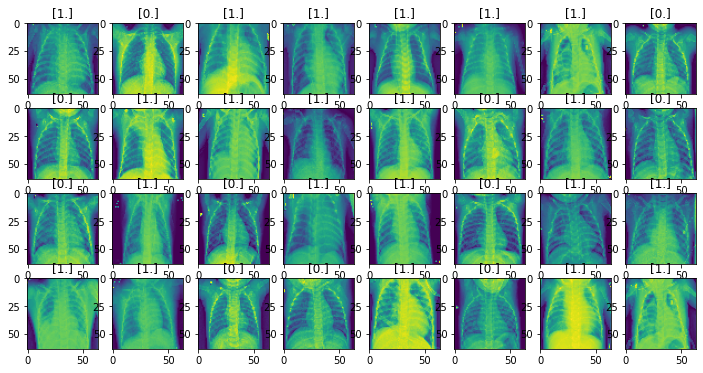

In [49]:
for images, labels in dataset_train.take(1):
    print(f"Image shape: {images.shape}")
    print(f"Label shape: {labels.shape}")
    
for images, labels in dataset_train.take(1):
    fig = plt.figure(figsize = (12, 6))
    for n in range(32):
        ax = plt.subplot(4, 8, n + 1)
        plt.imshow(images[n].numpy().astype("uint8"))
        plt.title(f"{labels[n]}")

## 5. Modeling

**Summary of the model:**
- This is a Convolutional Neural Network (CNN) designed for binary classification tasks.
- Five convolutional layers; filters in 32, 64 and 128 + maximum pooling layers.
- The feed is normalized by a rescaling layer that scales the pixel values of the image to [0, 1], improving the learning of the network
- The model has two Dense layers that learn more complex features. The first Dense layer contains 256 nodes and uses the ReLU activation function, and the second Dense layer contains 1 node and uses the sigmoid activation function to produce a binary classification result.
- The dropout technique reduces and prevents overfitting.
- The final output of the model is the sigmoid activation.

**Settings chosen:**
- Adam optimization algorithm, an efficient and commonly used optimization method.
- Binary-crossentropy is a typical choice for handling error functions.
- The accuracy of the model is monitored by assessing how well the model can classify the inputs into the correct classes.ct classes.ct classes.n luokkiin.

In [50]:
model = Sequential([
    Rescaling(1.0/255, input_shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [51]:
model.compile(
    optimizer='Adam',  
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

## 6. Training

- Koulutus suoritettiin 10 epookin ajan.
- Koulutuksessa käytetään erän (batch_size) kokoa 32.
- Koulutusdata ja validointidata ovat erikseen määriteltyj00.

In [52]:
epochs = 10
history = model.fit(
    dataset_train,
    epochs = epochs,
    batch_size=32,
    validation_data = dataset_validation
)

Epoch 1/10
131/131 [==============================] - 36s 261ms/step - loss: 0.4322 - accuracy: 0.8131 - val_loss: 0.2329 - val_accuracy: 0.8974
Epoch 2/10
131/131 [==============================] - 35s 260ms/step - loss: 0.2193 - accuracy: 0.9171 - val_loss: 0.1601 - val_accuracy: 0.9319
Epoch 3/10
131/131 [==============================] - 35s 259ms/step - loss: 0.1821 - accuracy: 0.9331 - val_loss: 0.1552 - val_accuracy: 0.9367
Epoch 4/10
131/131 [==============================] - 35s 262ms/step - loss: 0.1524 - accuracy: 0.9406 - val_loss: 0.1214 - val_accuracy: 0.9492
Epoch 5/10
131/131 [==============================] - 35s 262ms/step - loss: 0.1328 - accuracy: 0.9514 - val_loss: 0.1478 - val_accuracy: 0.9406
Epoch 6/10
131/131 [==============================] - 35s 264ms/step - loss: 0.1137 - accuracy: 0.9583 - val_loss: 0.1211 - val_accuracy: 0.9588
Epoch 7/10
131/131 [==============================] - 35s 262ms/step - loss: 0.1015 - accuracy: 0.9617 - val_loss: 0.1027 - val_ac

## 7. Performance and evaluation

- Both plots are looking good. There doesn't seem to bee underfitting, but overfitting seems to happen at the end in validation loss.
- Final performance is near perfect. Accuracy is .9794.

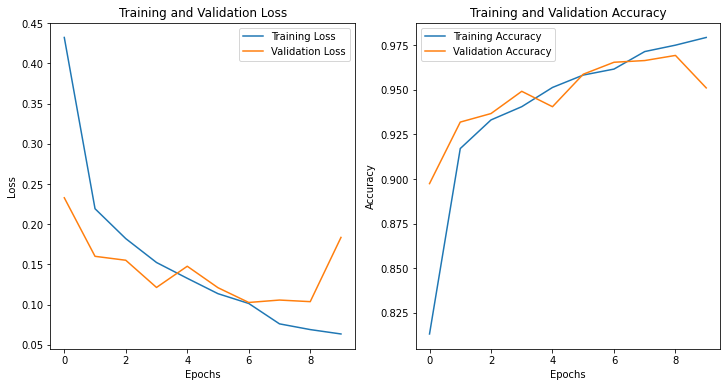

In [53]:
# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## 8. Discussion and conclusions

Discussions and conclusions of all models is in 1st model.
